In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

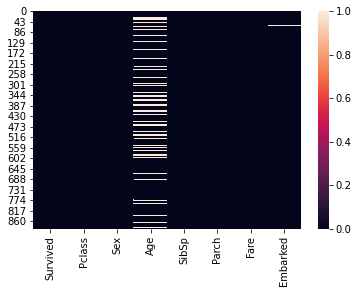

In [4]:
sns.heatmap(data=train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1).isnull())

<AxesSubplot:xlabel='Survived', ylabel='count'>

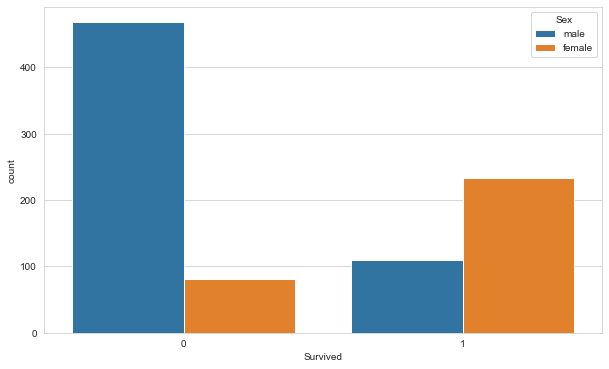

In [5]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='Survived',data = train, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

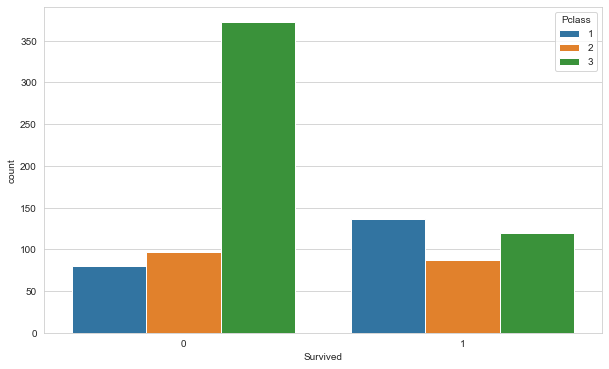

In [6]:
plt.figure(figsize=(10,6))

sns.countplot(x='Survived',data = train, hue='Pclass')

<Figure size 720x432 with 0 Axes>

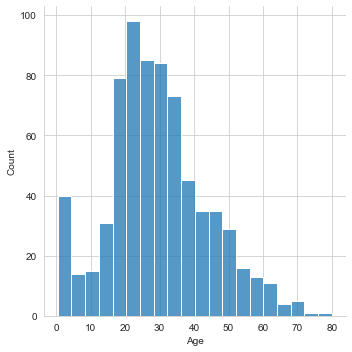

In [7]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.displot(data=train['Age'].dropna())

In [8]:
#average age by passenger
import cufflinks as cf
cf.go_offline()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

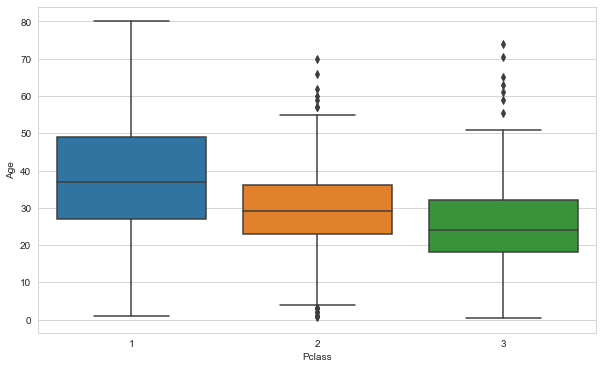

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=train)
#train.iplot(kind='box',x='Pclass',y='Age')

In [10]:
#train.describe()

In [11]:
#train.pivot_table(columns='Age',index='Pclass',aggfunc='count').head()

In [12]:
#train.unstack(['Pclass','Age'])

In [13]:
#train.transpose()

In [14]:
gp = train.groupby('Pclass')['Age'].mean().array

In [15]:
gp[2]

25.14061971830986

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age)== True:
        if Pclass == 1:
            return train.groupby('Pclass')['Age'].mean().array [0]
        elif Pclass == 2:
            return train.groupby('Pclass')['Age'].mean().array [1]
        else :
            return train.groupby('Pclass')['Age'].mean().array [2]
    else:
        return Age

In [272]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [273]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C


<AxesSubplot:>

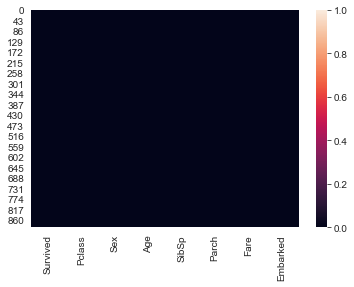

In [274]:
sns.heatmap(data=train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1).isnull())

In [275]:
train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [276]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [277]:
dum_sex = pd.get_dummies(data=train['Sex'],drop_first=True)

In [278]:
dum_embark = pd.get_dummies(data=train['Embarked'],drop_first=True)

In [279]:
train = pd.concat([train,dum_sex,dum_embark],axis=1)

In [280]:
train.drop(['Sex','Embarked'], axis=1, inplace=True)

In [281]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,1
887,1,1,19.00000,0,0,30.0000,0,0,1
888,0,3,25.14062,1,2,23.4500,0,0,1
889,1,1,26.00000,0,0,30.0000,1,0,0


In [282]:
X= train.drop('Survived',axis=1)
y = train['Survived'] 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [283]:
logreg = LogisticRegression()

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [285]:
logreg.fit(X_train,y_train)

D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [286]:
predictions = logreg.predict(X_test)

In [287]:
from sklearn.metrics import classification_report

In [288]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268

